# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')


# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
total_mice = len(data_df['Mouse ID'].unique())
print(f'Number of mice in all the treatment regimens is: {total_mice}')

Number of mice in all the treatment regimens is: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mice = data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_ID = data_df.loc[duplicated_mice, 'Mouse ID'].unique()

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data_df = data_df.loc[data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
fival_data_df = data_df.drop(duplicated_mice_ID_data_df.index)

In [9]:
# Checking the number of mice in the clean DataFrame.
mices_to_pieces_data = len(fival_data_df['Mouse ID'].unique())
print(f'Number of mice in all the treatment regimens is: {fival_data_df} (removed duplicated mice data)')

Number of mice in all the treatment regimens is:      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1       

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_gp = data_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen_gp['Tumor Volume (mm3)'].mean()
median = drug_regimen_gp['Tumor Volume (mm3)'].median()
var = drug_regimen_gp['Tumor Volume (mm3)'].var()
std = drug_regimen_gp['Tumor Volume (mm3)'].std()
sem = drug_regimen_gp['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem})
print('Drug Regimen Report')
summary_statistics_df

Drug Regimen Report


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_table = drug_regimen_gp['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_table.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'})
# Using the aggregation method, produce the same summary statistics in a single line
print('Second Drug Study')
summary_agg_df

Second Drug Study


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

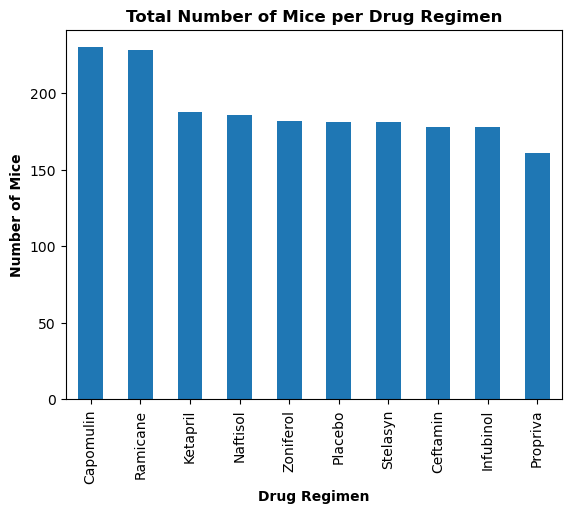

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_regimen = drug_regimen_gp['Mouse ID'].count().sort_values(ascending=False)
mice_per_regimen
pd_bar_mice_per_regimen = mice_per_regimen.plot(kind='bar', width=0.5)
pd_bar_mice_per_regimen.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_ylabel('Number of Mice', fontweight = 'bold')
plt.show()

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


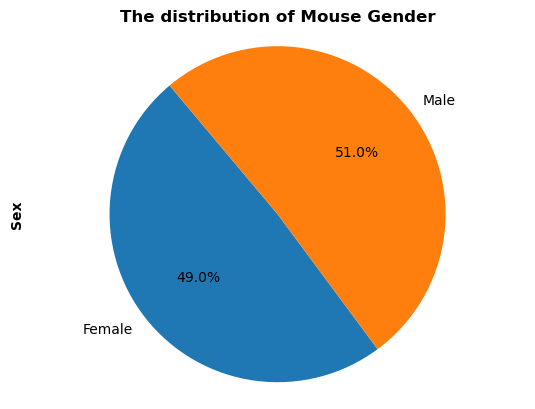

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = fival_data_df.groupby('Sex')['Sex'].count()
mouse_gender
pd_pie_mouse_gender = mouse_gender.plot(kind='pie', autopct='%1.1f%%', startangle=130)
plt.axis("equal")
pd_pie_mouse_gender.set_title(label='The distribution of Mouse Gender', fontweight = 'bold')
pd_pie_mouse_gender.set_ylabel('Sex', fontweight = 'bold')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

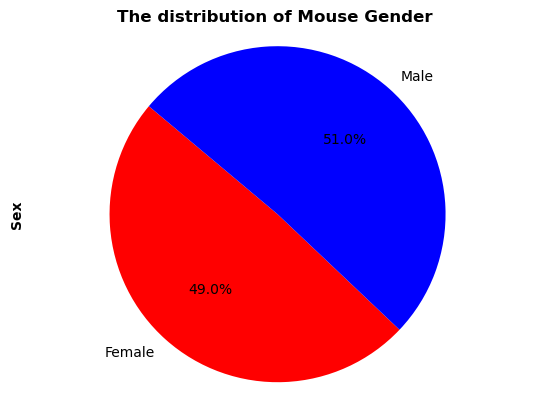

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = mouse_gender.index
colors = ['red','blue']
py_bar_mice_sex = plt.pie(mouse_gender, labels=mouse_gender.index, autopct="%1.1f%%", colors=colors, startangle=140)
plt.axis("equal")
plt.title('The distribution of Mouse Gender ', fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')
plt.show


## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_regimen = []
# Start by getting the last (greatest) timepoint for each mouse
last_tumor_vol = fival_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
#last_tumor_df = last_tumor_vol.reset_index()
#last_tumor_df_list = []

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_merged_data_df = pd.merge(fival_data_df,last_tumor_df , how='outer', on=['Mouse ID', 'Mouse ID'])

In [100]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_regimen=[] 

# Create empty list to fill with tumor vol data (for plotting)
last_tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
value = last_tumor_df['Tumor Volume (mm3)']
drug_regimen_df.append(value)
    
for drug in drug_regimen:
      
    quartiles = last_tumor_vol.quantile([0.25 ,0.5,0.75])
    lowerquart = quartiles[0.25]
    upperquart = quartiles[0.75]
    mean = last_tumor_vol.mean()
    iqr = upperquart-lowerquart    
    lower_bound = lowerquart - (1.5*iqr)
    upper_bound = upperquart + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_tumor_vol = last_tumor_df.loc[last_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset last_tumor_vol_list.append(last_tumor_vol)
    last_tumor_vol_list.append(last_tumor_vol)

    # Determine outliers using upper and lower bounds
    outliers_count_df = last_tumor_vol.loc[(last_tumor_vol < lower_bound) 
                    (last_tumor_vol > upper_bound)]
    outliers_count_df

print(f"{drug} Regimen")
print(f"last tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
print(f"last tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
print(f"Number of outliers for Capomulin is: {outliers.count()}")
print(f"Number of outliers for Ramicane is: {outliers.count()}")
print(f"Number of outliers for Infubinol is: {outliers.count()}")
print(f"Number of outliers for Ceftamin is: {outliers.count()}")
if outliers.count() > 0:
    
    for i in outliers.index:
        print(f'Outlier last tumor volume(mm3) is {round(outliers[i], 2)}')
   


Capomulin Regimen
last tumor volume(mm3) for Capomulin below 20.7 could be outliers.
last tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67


NameError: name 'outliers' is not defined

ValueError: Dimensions of labels and X must be compatible

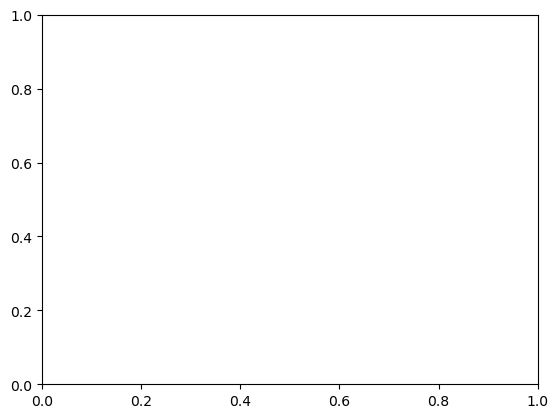

In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, last_tumor_plot = plt.subplots()
last_tumor_plot.boxplot(last_tumor_vol_list, labels="Drug Regimen", flierprops={'markerfacecolor':'r','markersize': 10})
last_tumor_plot.set_title('Last Tumor Volume \n(Treatment Regimens)', fontweight='bold')
last_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
last_tumor_plot.set_ylabel('Last Tumor Volume (mm3)', fontweight='bold')


plt.show()
#last_tumor_df.head()

## Line and Scatter Plots

In [105]:
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


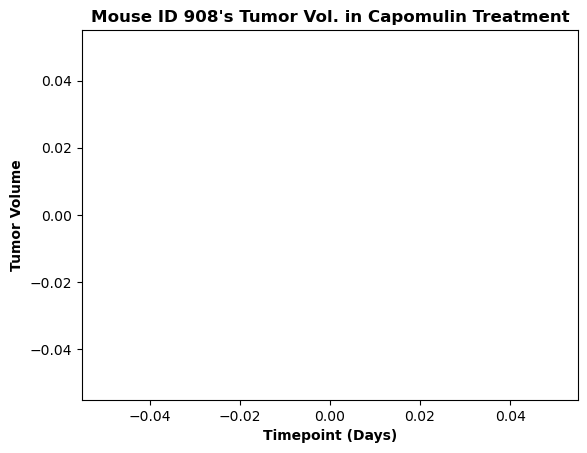

In [120]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = fival_data_df.loc[fival_data_df['Drug Regimen'] == 'Capomulin']
mouse_id = '908'
mouse_df = Capomulin_df[Capomulin_df['Mouse ID'] == mouse_id]
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker = '*')
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume', fontweight='bold')
plt.show()


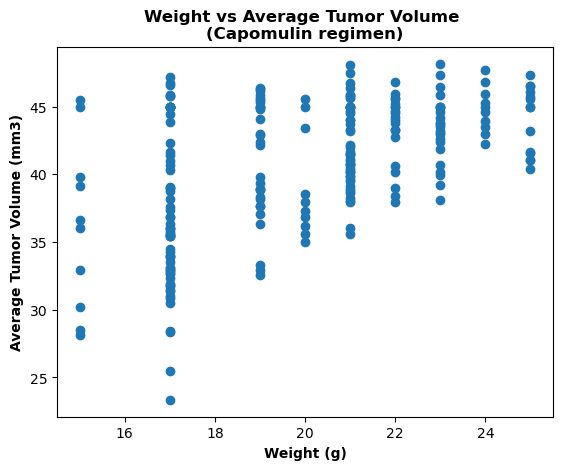

In [106]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mice_weight_avg = Capomulin_df['Weight (g)']
mice_tumor_avg = Capomulin_df['Tumor Volume (mm3)']
plt.scatter(mice_weight_avg, mice_tumor_avg)
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor vol is 1.0
The r-squared is: 0.28


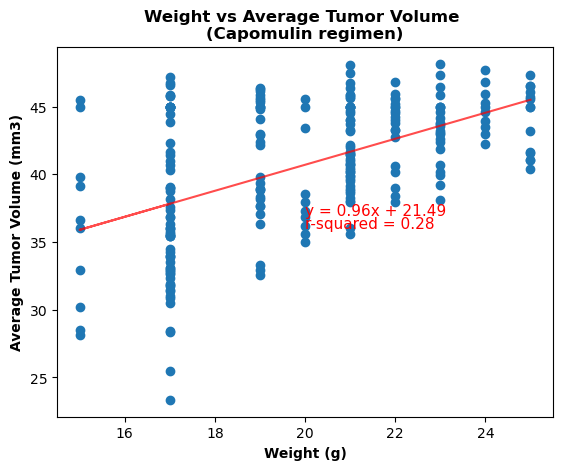

In [110]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mice_weight_avg
y_values = mice_tumor_avg
correlation = round(st.pearsonr(x_values, y_values)[0],0)
print(f"The correlation between mouse weight and tumor vol is {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)
 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')


plt.show()
